In [1]:
#importing required libraries
import pandas as pd
import numpy as np

#library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
hec = pd.read_csv('yield.csv')

In [3]:
#Display first 5 rows of the dataframe
hec.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [4]:
#Display last 5 rows of the dataframe
hec.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


In [5]:
hec.shape

(56717, 12)

In [6]:
#rename columns
#easier to recognise the crops production value
hec = hec.rename(index = str, columns = {"Value": "hg/ha_yield"})
hec.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [7]:
#drop unwanted columns
hec = hec.drop(['Domain Code', 'Domain', 'Area Code', 'Element Code', 'Element', 'Item Code', 'Year Code', 'Unit'], axis=1)
hec.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [8]:
#summary of statistics
hec.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [9]:
hec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [10]:
#upload rainfall file
rain = pd.read_csv('rainfall.csv')
rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [11]:
rain.tail()

,Area,Year,average_rain_fall_mm_per_year
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657
6726,Zimbabwe,2017,657


In [12]:
rain.shape

(6727, 3)

In [13]:
rain = rain.rename(index = str, columns = {" Area": "Area"})

In [14]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [15]:
#convert average_rain_fall_mm_per_year from object to float
rain['average_rain_fall_mm_per_year'] = pd.to_numeric(rain['average_rain_fall_mm_per_year'], errors = 'coerce')
rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [16]:
#drop unwanted rows
rain = rain.dropna()

In [17]:
rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [18]:
#upload pesticides file
pes = pd.read_csv('pesticides.csv')
pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [19]:
#easier to recognise value of pesticides
pes = pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
pes = pes.drop(['Domain', 'Element', 'Item', 'Unit'], axis=1)
pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [20]:
pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [21]:
pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [22]:
final = pd.merge(hec, rain, on=['Year', 'Area'])
final.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [23]:
final = pd.merge(final, pes, on=['Year', 'Area'])
final.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


In [24]:
final.shape

(18949, 6)

In [25]:
avg_temp = pd.read_csv('temp.csv')
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [26]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [27]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country": "Area"})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [28]:
final = pd.merge(final, avg_temp, on=['Area', 'Year'])
final.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [29]:
final.shape

(28242, 7)

In [30]:
#Exploratory Data Analysis
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [31]:
#Check if there are missing values
final.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [32]:
#Check again if there are any missing values, true means there are still missing values
final.isnull().values.any()

False

In [33]:
final.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [34]:
#Numerical features
num_col = final.select_dtypes(include = np.number).columns.tolist()
print('There are', len(num_col), 'numerics, including:')
print(num_col)

There are 5 numerics, including:
['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']


In [35]:
#Categorical features
cat_col = final.select_dtypes(include = object).columns.tolist()
print('There are', len(cat_col), 'categoricals, including:')
print(cat_col)

There are 2 categoricals, including:
['Area', 'Item']


In [36]:
#Extract details on categorical features
for i in cat_col:
    options_no = final[i].nunique() #how many options available
    options_name = final[i].unique().tolist() #options in each category
    print( i, 'has', options_no, 'unique variables, including:' )
    print(options_name,'\n')

Area has 101 unique variables, including:
['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'Colombia', 'Croatia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Pakistan', 'Papua New Guinea', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia',

In [37]:
#Check Item data
final.Item.value_counts()

Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: Item, dtype: int64

In [38]:
final.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [39]:
#counting the number of countries in dataframe
final['Area'].nunique()

101

In [40]:
#counting the 10 highest crop production
final.groupby(['Area'], sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

In [41]:
#counting the top 10 highest area and item
final.groupby(['Item', 'Area'], sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

In [42]:
#random samples in the dataset
final.sample(10)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
24728,South Africa,Potatoes,1996,261054,495.0,19508.00,15.23
5443,Cameroon,Sorghum,1999,11239,1604.0,653.00,24.97
11724,India,Wheat,1996,24828,1083.0,56114.00,23.81
10536,India,Maize,1990,15178,1083.0,75000.00,24.10
10722,India,Potatoes,1991,162540,1083.0,72133.00,25.85
14225,India,Maize,2012,25557,1083.0,52980.00,25.82
18853,Mauritania,Maize,2011,6611,92.0,13.35,27.87
22804,Pakistan,Sorghum,2008,6262,494.0,4946.79,26.74
6433,Chile,Potatoes,2005,200600,1522.0,9830.72,13.06
1983,Azerbaijan,Sorghum,2013,5000,447.0,489.80,14.12


In [43]:
final.describe().T 
# summary of statistics for numerical columns that includes count, mean, standard deviation etc.
# .T: transpose the table to make it easy to read

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [44]:
#Counting the smallest crop production
final.groupby(['Area'], sort=True)['hg/ha_yield'].sum().nsmallest(11)

Area
Botswana                     470651
Eritrea                     1452416
Montenegro                  1645100
Sudan                       1896346
Namibia                     3165475
Estonia                     3595638
Latvia                      3698588
Tunisia                     3724246
Nepal                       4113713
Lithuania                   4174348
Central African Republic    4255627
Name: hg/ha_yield, dtype: int64

In [45]:
cols = set(final.columns) - {'Year'}
df1 = final[list(cols)]
df1.describe().T
# summary of statistics for numerical columns that includes count, mean, standard deviation etc.
# column year were drop
# .T: transpose the table to make it easy to read

,count,mean,std,min,25%,50%,75%,max
hg/ha_yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65
average_rain_fall_mm_per_year,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00


In [46]:
final.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


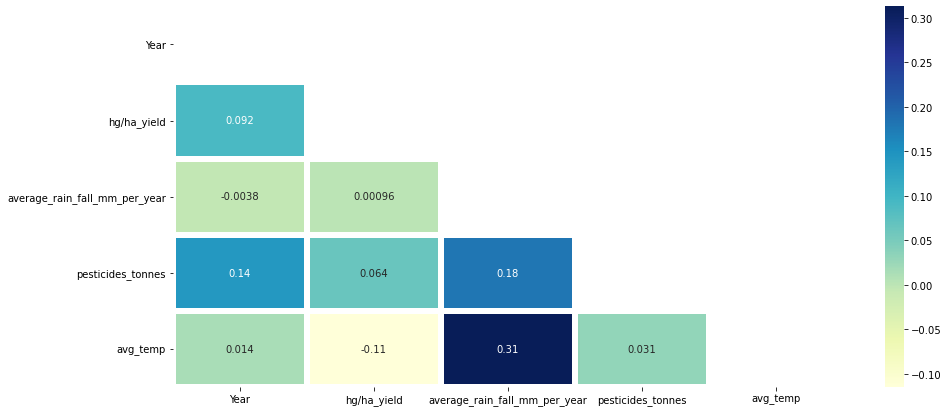

In [47]:
#visualization
plt.figure(figsize=(15,7))
sns.heatmap(final.corr(), mask=np.triu(final.corr()), annot=True, cmap='YlGnBu',linewidth=5)
plt.show()


In [48]:
#Data preprocessing (Turn raw data into clean data set)
#encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

final_onehot = pd.get_dummies(final, columns=['Area', 'Item'], prefix = ['Country', 'Item'])
features=final_onehot.loc[:, final_onehot.columns != 'hg/ha_yield']
label=final['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
features = features.drop(['Year'], axis=1)

In [50]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: float64(3), uint8(111)
memory usage: 3.9 MB


In [52]:
#scalling features

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [53]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [54]:
final.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [55]:
#Training data
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [56]:
#Model comparison
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data, train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels, y_pred)
    return([model_name, r2])

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    LogisticRegression(),
    LinearRegression(),
    svm.SVR(),
    DecisionTreeRegressor()
]

In [57]:
model_train = list(map(compare_models,models))

In [58]:
print(*model_train, sep = "\n")

['RandomForestRegressor', 0.6842532317855172]
['LogisticRegression', 0.6814053026393077]
['LinearRegression', 0.7539524699128073]
['SVR', -0.19543203867357395]
['DecisionTreeRegressor', 0.9598545003385185]


In [ ]:
#From the result, Decision Tree Regressor has the highest score with 96%
# Logistic & Linear Regression has 68% and 75% respectively

In [59]:
final_onehot = final_onehot.drop(['Year'], axis=1)
final_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,66667,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23333,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12500,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
#Testing the data
#Setting test data to columns from DF and excluding 'yield' values
test = pd.DataFrame(test_data, columns=final_onehot.loc[:, final_onehot.columns != 'hg/ha_yield'].columns)

#Using stack function to return a reshaped DF by pivoting the columns of current df
cntry = test[[col for col in test.columns if 'Country' in col]].stack()[test[[col for col in test.columns if 'Country' in col]].stack()>0]
cntrylist = list(pd.DataFrame(cntry).index.get_level_values(1))
countries = [i.split("_")[1] for i in cntrylist]

itm = test[[col for col in test.columns if 'Item' in col]].stack()[test[[col for col in test.columns if 'Item' in col]].stack()>0]
itmlist = list(pd.DataFrame(itm).index.get_level_values(1))
items = [i.split("_")[1] for i in itmlist]

In [61]:
test.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.183443,0.110716,0.542078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.458451,0.000413,0.627257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.183443,0.106159,0.518228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.000000,0.224154,0.890971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.458451,0.000355,0.625213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
test.drop([col for col in test.columns if 'Item' in col], axis=1, inplace=True)
test.drop([col for col in test.columns if 'Country' in col], axis=1, inplace=True)
test.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.183443,0.110716,0.542078
1,0.458451,0.000413,0.627257
2,0.183443,0.106159,0.518228
3,1.000000,0.224154,0.890971
4,0.458451,0.000355,0.625213


In [63]:
test['Country'] = countries
test['Item'] = items
test.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.183443,0.110716,0.542078,Spain,"Rice, paddy"
1,0.458451,0.000413,0.627257,Madagascar,Wheat
2,0.183443,0.106159,0.518228,Spain,Sorghum
3,1.000000,0.224154,0.890971,Colombia,Potatoes
4,0.458451,0.000355,0.625213,Madagascar,Sweet potatoes


In [64]:
logmodel = DecisionTreeRegressor()
logmodel.fit(train_data,train_labels)

DecisionTreeRegressor()

In [65]:
pred = logmodel.predict(test_data)

In [66]:
clf = DecisionTreeRegressor()
model = clf.fit(train_data, train_labels)

test["predicted_prod"] = model.predict(test_data)
test["actual_prod"] = pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group = test.groupby("Item")
test_group.apply(lambda x: r2_score(x.actual_prod, x.predicted_prod))

Item
Cassava                 0.927934
Maize                   0.884460
Plantains and others    0.820176
Potatoes                0.908125
Rice, paddy             0.895020
Sorghum                 0.790261
Soybeans                0.848017
Sweet potatoes          0.847132
Wheat                   0.923130
Yams                    0.930511
dtype: float64

In [67]:
def adjusted_r_squared(y, yhat, x):
    score = 1- (((1-(r2_score(y, yhat)))*(len(y)-1)) / (len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.actual_prod, x.predicted_prod, x))

Item
Cassava                 0.926998
Maize                   0.883713
Plantains and others    0.810895
Potatoes                0.907559
Rice, paddy             0.894147
Sorghum                 0.788382
Soybeans                0.846784
Sweet potatoes          0.845709
Wheat                   0.922593
Yams                    0.928073
dtype: float64

In [70]:
#Model Results
varimp= {'Significance':model.feature_importances_,'Names':final_onehot.columns[final_onehot.columns!="hg/ha_yield"]}

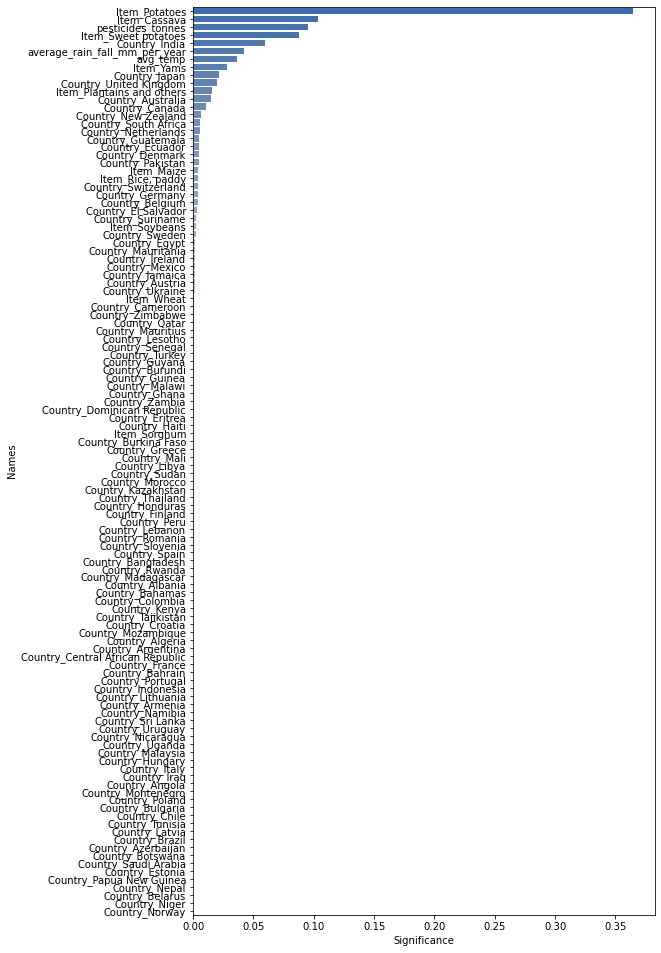

In [71]:
#Plotting the features importance 
a4_dims = (8.27,16.7)

fig, ax = plt.subplots(figsize=a4_dims)
final = pd.DataFrame.from_dict(varimp)
final.sort_values(ascending=False,by=["Significance"],inplace=True)
final = final.dropna()
sns.barplot(x="Significance", y="Names", palette="vlag", data=final, orient="h", ax=ax);

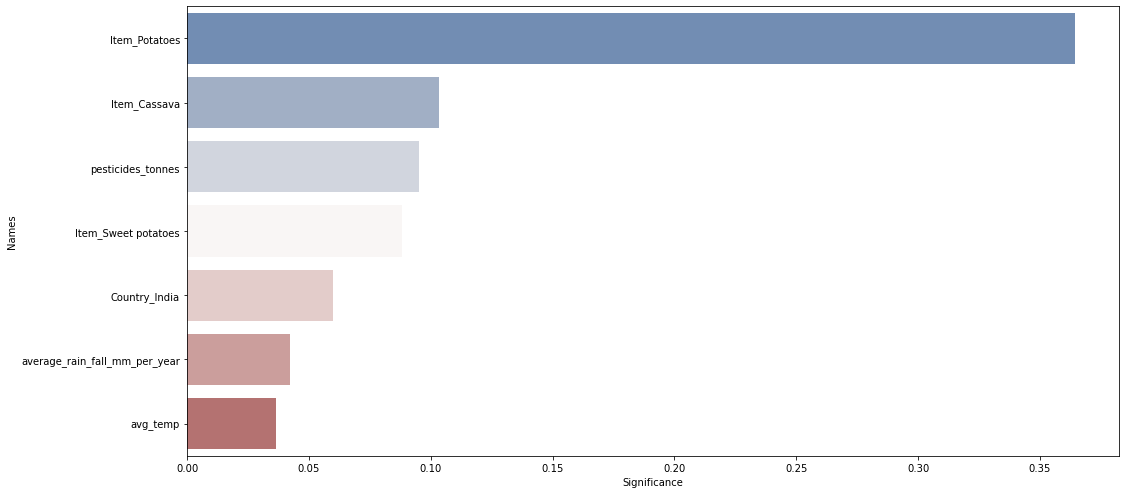

In [75]:
#Simplify into top 7 features importance
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
final=pd.DataFrame.from_dict(varimp)
final.sort_values(ascending=False,by=["Significance"],inplace=True)
final=final.dropna()
final=final.nlargest(7, 'Significance')
sns.barplot(x="Significance", y="Names", palette="vlag", data=final, orient="h", ax=ax);

In [84]:
df = pd.DataFrame(final)
df.to_csv('final_fyp3.csv')
df.to_csv('C:/Users/User/Desktop/final_fyp3.csv')

In [85]:
test

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item,predicted_prod,actual_prod
0,0.183443,0.110716,0.542078,Spain,"Rice, paddy",72172.0,69220
1,0.458451,0.000413,0.627257,Madagascar,Wheat,25000.0,20000
2,0.183443,0.106159,0.518228,Spain,Sorghum,51206.0,51206
3,1.000000,0.224154,0.890971,Colombia,Potatoes,156377.0,166986
4,0.458451,0.000355,0.625213,Madagascar,Sweet potatoes,53407.0,56319
...,...,...,...,...,...,...,...
8468,1.000000,0.165010,0.741738,Colombia,"Rice, paddy",48001.0,47116
8469,0.255880,0.228428,0.354003,France,Sorghum,58655.0,55990
8470,0.609909,0.032640,0.636457,Guatemala,Wheat,20124.0,20987
8471,0.624020,0.001989,0.796252,Mauritius,Maize,80000.0,68333


In [86]:
df = pd.DataFrame(test)
df.to_csv('test_final.csv')
df.to_csv('C:/Users/User/Desktop/test_final.csv')